<a id="section1"></a>
#### Erroen kokaeraren adibide sinplea

Erroen kokaera `evans` komandua erabiliz. beti bezala lehenago begizta irekiko transferentzia funtzioa definitzen da (Berrelikadura unitarioa)
<a id="warmUpExercise"></a>

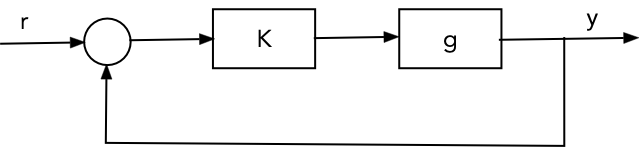


In [1]:
s=%s;
g=1/s/(s + 1)/(s + 3);g.dt='c'

 g  = 
         1        
   -------------  
   3s +4s^2 +s^3  


`evans` komandua erabiltzen da. 'Datatips' erabilita egonkortasun muga ikus daiteke. `sgrid` komandua erabiltzen da $\omega_n$ eta $\delta$ konstanteak islatzeko.

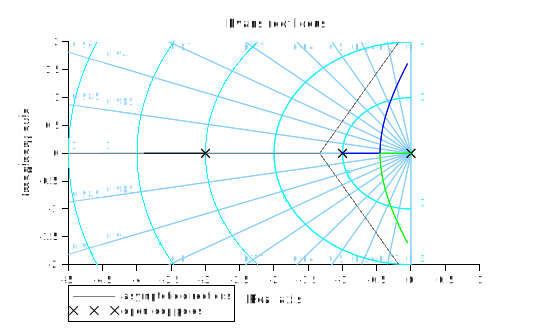

In [5]:
%plot inline //or native
scf(1);
evans(g,10)
sgrid()
set(gca(),"data_bounds",matrix([-5,1,-2,2],2,-1));

Egonkortasuna
* $0<K<12$

Sistema motela eta oszilaziorik gabe $K=0.63$ izan arte. Gero oszilakorra da, gero eta oszilakorragoa, ez egonkorra izan arte.

Adibide, numerikoak.

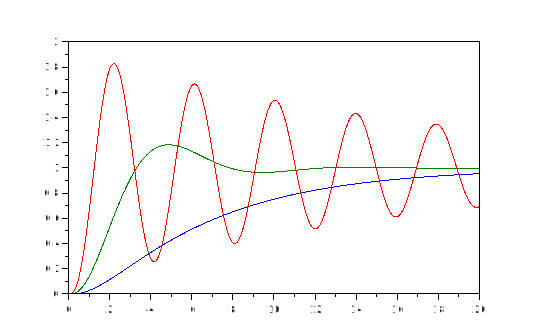

In [6]:
%plot inline //or native
t=0:0.01:20.1;
K=0.4;
gitxia=(K*g)/.(1);
y1=csim('step',t,gitxia);
K=2;
gitxia=(K*g)/.(1);
y2=csim('step',t,gitxia);
K=10;
gitxia=(K*g)/.(1);
y3=csim('step',t,gitxia);

scf(2);
plot(t,y1,t,y2,t,y3)

set(gca(),"data_bounds",matrix([0,20,0,2],2,-1));

Begiratzeko $\delta=0.5$ non den, `sgrid` komanduak emandako lerroak aztertuz balio hori non gurutzatzen den EKn

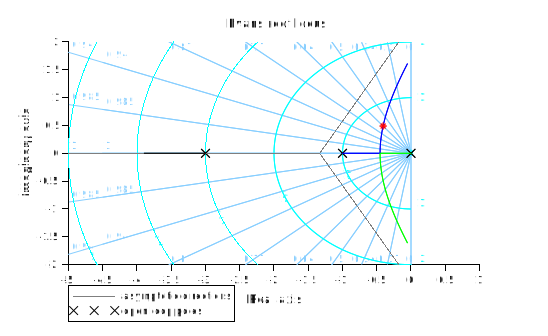

In [9]:
%plot inline //or native

evans(g,10)
sgrid()
s1=-0.407+%i*0.49;
plot(real(s1),imag(s1),'*r')
set(gca(),"data_bounds",matrix([-5,1,-2,2],2,-1));


Hau da, $K=1.3$ gutxi gorabehera.

#### Bertsio diskretua

Lehengo lagintze denbora ($T_l$) aukeratu behar da. Ez dagoenez argi begizta itxiko abiadura, erreferentzia bat aukeratzen dugu (egokia ez bada, gero aldatu daiteke).

Kasu honetan, aukeratzen da $K=1$, eta begiratzen da emaitza denbora eremuan

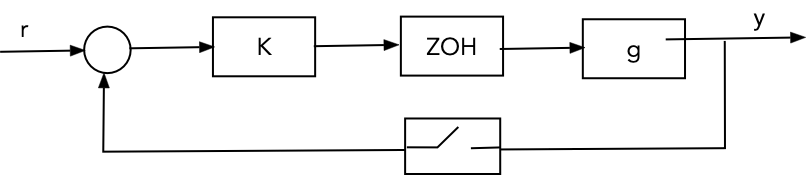



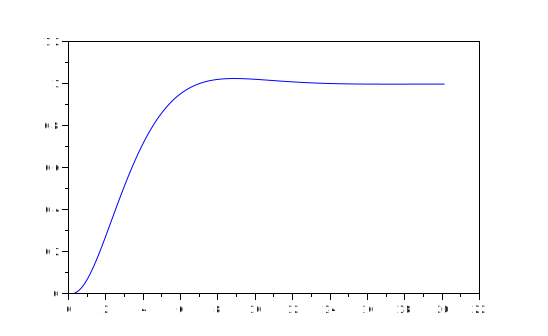

In [10]:
K=1;
gitxia=(K*g)/.(1);
y=csim('step',t,gitxia);
scf(2);
plot(t,y)

Puntako denbora $T_1=9$ s da gutxi gorabehera, beraz $T_l=T_1/15$ ($10-15$) tartea egokia izan daiteke).

$T_l$ horrekin bertsio diskretua lortzen da.

In [11]:
Tl=9/15;
gz=ss2tf(dscr(g,Tl))


 gz  = 
     0.0063028 +0.0482406z +0.0207781z^2     
   ----------------------------------------  
   -0.090718 +0.8048285z -1.7141105z^2 +z^3  


Errepikatzen da prozesuan Z planoan; kasu honetan `zgrid` komandua erabiltzen da $\omega_n$ eta $\delta$ konstanteak islatzeko.

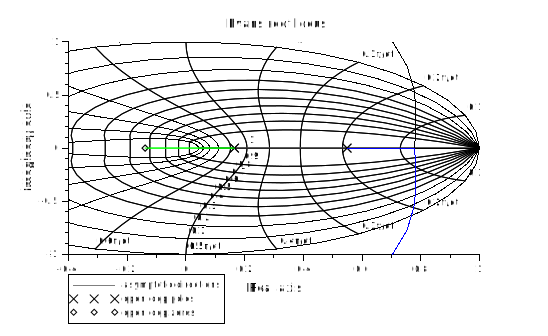

In [16]:
%plot inline
evans(gz)
zgrid()
set(gca(),"data_bounds",matrix([-0.4,1,-1,1],2,-1));

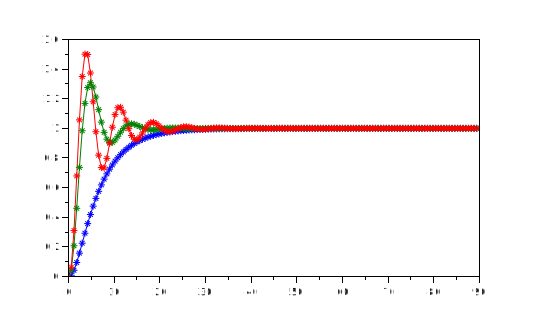

In [17]:
u=ones(1,150);
t=[0:length(u)-1]*Tl;
K=0.4;
gitxiaz=(K*gz)/.(1);
y1=dsimul(tf2ss(gitxiaz),u);
K=2;
gitxiaz=(K*gz)/.(1);
y2=dsimul(tf2ss(gitxiaz),u);
K=3;
gitxiaz=(K*gz)/.(1);
y3=dsimul(tf2ss(gitxiaz),u);

plot(t,y1,t,y2,t,y3)
plot(t,y1,'*',t,y2,'*',t,y3,'*')

Zergaitik aukeratu dut $K$ mazimo txikiagoa?

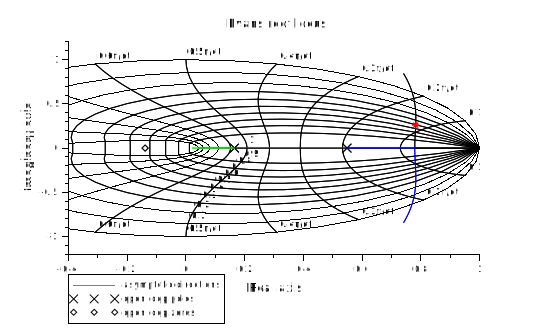

In [20]:
%plot inline //native 
evans(gz,10)
zgrid()
z1=0.783+%i*0.26;
plot(real(z1),imag(z1),'*r')
set(gca(),"data_bounds",matrix([-0.4,1,-1.2,1.2],2,-1));

$K$-ren balioa antzekoa da, baina pixka bat handiagoa (1.37)